1. Install Dependencies and Setup
   

In [1]:
!pip install tensorflow 

In [2]:
!pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.1.0
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.12.3
aiohttp                           3.9.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.0
anaconda-project                  0.11.1
annotated-ty

In [3]:
import tensorflow as tf
import os

In [4]:
!pip install opencv-contrib-python

2. Remove dodgy images

In [5]:
import cv2
import imghdr

C:\Users\ACER\AppData\Local\Temp\ipykernel_11432\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
data_dir = 'data'

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data\happy\.ipynb_checkpoints


3. Load Data

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 255 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

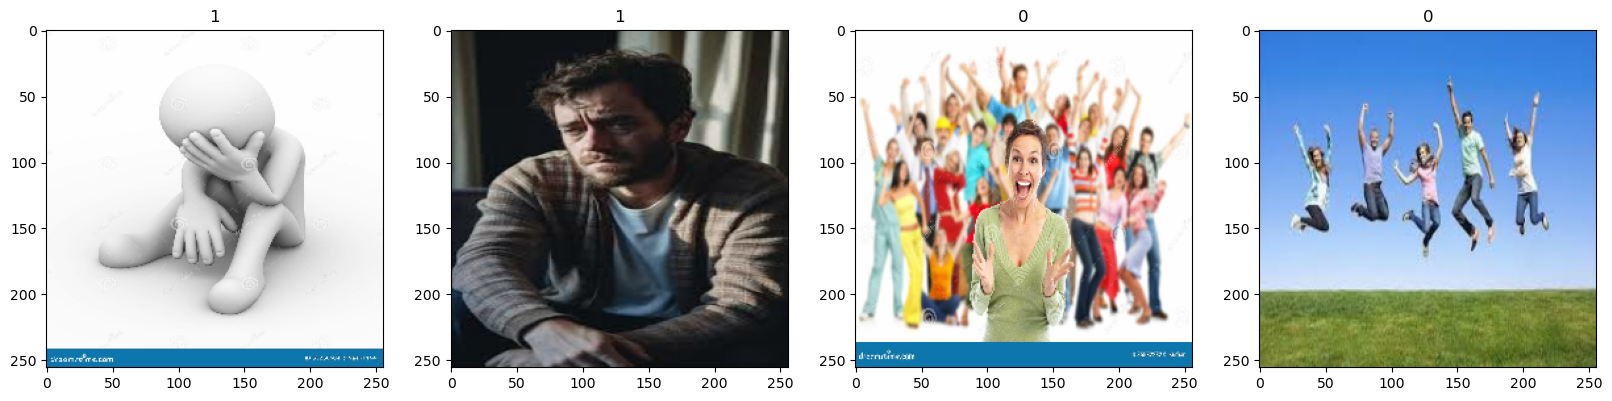

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

4. Scale Data

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()

(array([[[[4.76557702e-01, 4.31101590e-01, 3.62591922e-01],
          [5.22471488e-01, 4.51883227e-01, 3.65118533e-01],
          [6.57138467e-01, 5.54319859e-01, 4.46721822e-01],
          ...,
          [9.49503124e-01, 7.56556392e-01, 2.56328493e-01],
          [9.29473042e-01, 7.33394623e-01, 2.58884817e-01],
          [8.77205908e-01, 6.77205861e-01, 2.18382359e-01]],
 
         [[5.50028741e-01, 4.90259260e-01, 4.19697851e-01],
          [5.80894828e-01, 5.00073731e-01, 4.06789035e-01],
          [6.87429130e-01, 5.72527945e-01, 4.62091178e-01],
          ...,
          [9.24866915e-01, 7.28788495e-01, 2.38592416e-01],
          [8.97977948e-01, 7.01899529e-01, 2.27389708e-01],
          [8.70725155e-01, 6.70725167e-01, 2.07980052e-01]],
 
         [[6.06876135e-01, 5.33418536e-01, 4.55943614e-01],
          [6.38163507e-01, 5.38214207e-01, 4.40277457e-01],
          [7.05915868e-01, 5.73830068e-01, 4.58547801e-01],
          ...,
          [9.05606627e-01, 7.05606639e-01, 2.4286

In [16]:
len(data)

8

5. Split Data

In [17]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [18]:
test_size

1

In [19]:
train_size

5

In [20]:
val_size

2

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

6. Build Deep Learning Model

In [22]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\ACER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

7. Train

In [28]:
logdir='logs'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.4484 - loss: 1.1692 - val_accuracy: 0.6250 - val_loss: 0.6177
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 976ms/step - accuracy: 0.5381 - loss: 0.6545 - val_accuracy: 0.5156 - val_loss: 0.6577
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 937ms/step - accuracy: 0.5819 - loss: 0.6278 - val_accuracy: 0.5312 - val_loss: 0.6375
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 954ms/step - accuracy: 0.6073 - loss: 0.5992 - val_accuracy: 0.5781 - val_loss: 0.6177
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 906ms/step - accuracy: 0.6600 - loss: 0.5916 - val_accuracy: 0.7656 - val_loss: 0.5542
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 960ms/step - accuracy: 0.7615 - loss: 0.5400 - val_accuracy: 0.6875 - val_loss: 0.5658
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7304 - loss: 0.5284 - val_accuracy: 0.6562 - val_loss: 0.6587
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 870ms/step - accuracy: 0.6931 - loss: 0.6312 - val_accuracy: 0.8125 - val_loss: 0.48

8. Plot Performance

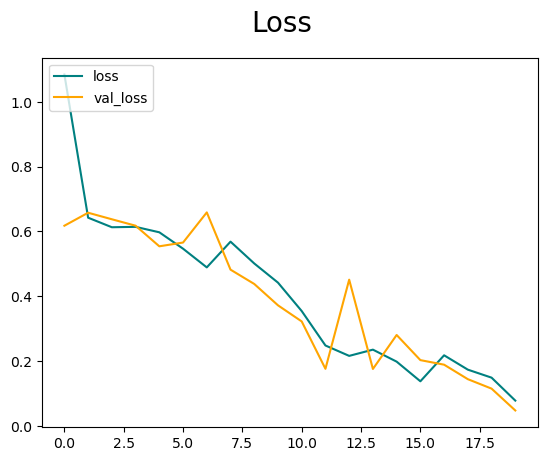

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

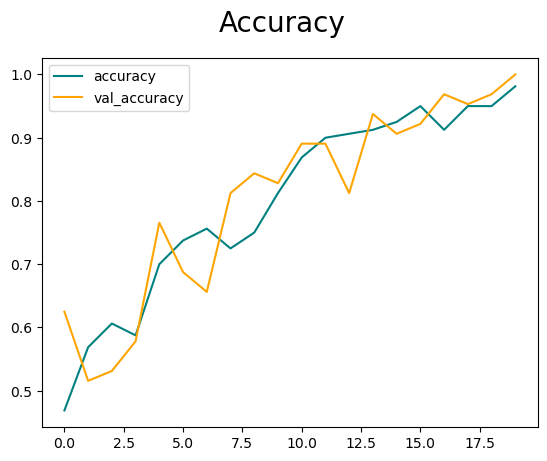

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

9. Evaluate

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
len(test)

1

In [35]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [36]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


In [37]:
print(yhat)

[[9.69842911e-01]
 [1.31449224e-02]
 [1.19068995e-04]
 [9.36207235e-01]
 [1.10034249e-03]
 [5.25701884e-03]
 [9.98343110e-01]
 [6.60416961e-01]
 [1.93687417e-02]
 [1.64622981e-02]
 [9.97254431e-01]
 [9.65848744e-01]
 [2.49777571e-03]
 [9.47422348e-03]
 [3.14264791e-04]
 [1.32954828e-02]
 [9.78809655e-01]
 [1.60721934e-03]
 [4.03323919e-02]
 [8.68662059e-01]
 [2.13644691e-02]
 [4.00606170e-02]
 [9.55350406e-04]
 [4.05218303e-01]
 [1.65992621e-02]
 [1.03810681e-02]
 [2.25196704e-01]
 [1.34573621e-03]
 [6.27251446e-01]
 [2.15302018e-04]
 [2.47618562e-04]]


In [38]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()},Accuracy: {acc.result().numpy()}')

Precision:1.0, Recall:0.8999999761581421,Accuracy: 0.9677419066429138


In [39]:
#train.class_indice

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create the generator
train_generator = ImageDataGenerator()

# Use flow_from_directory
train_data = train_generator.flow_from_directory(
 'data', # replace with your actual path
 target_size=(256, 256),
 batch_size=32,
 class_mode='binary'
)

# Print the class indices
print(train_data.class_indices)

Found 255 images belonging to 3 classes.
{'.ipynb_checkpoints': 0, 'happy': 1, 'sad': 2}


10. Test

In [40]:
import cv2

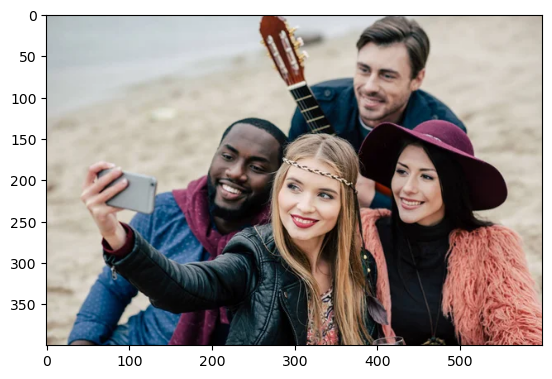

In [41]:

img = cv2.imread('123456789.jpg')
img1=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.show()

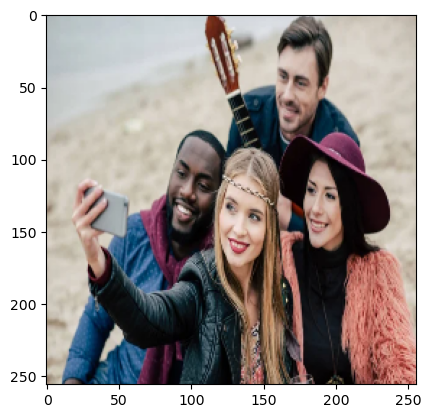

In [42]:
resize = tf.image.resize(img1, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [43]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


In [44]:
yhat

array([[0.7237121]], dtype=float32)

In [45]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


here we can interprete that the Model is not trained well, mabye there is one parameter not optimized or the length data is not satisfied  

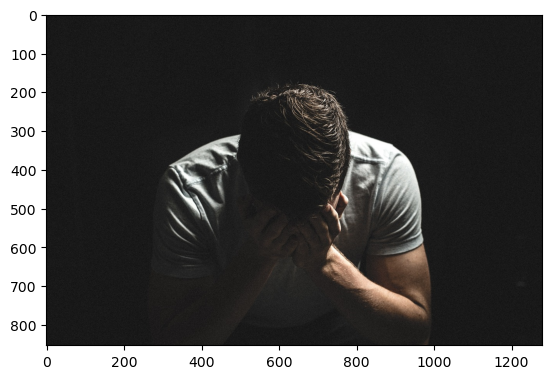

In [46]:
img2 = cv2.imread('987654321.jpg')
img3=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.imshow(img3)
plt.show()

In [48]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


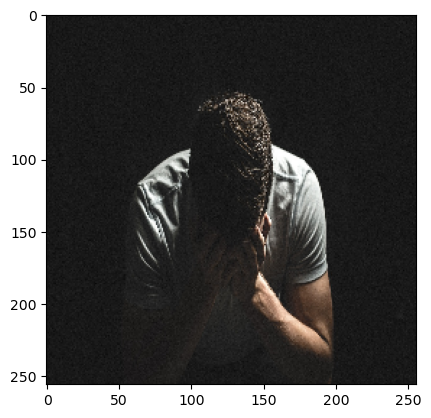

In [47]:
resize = tf.image.resize(img3, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [49]:
yhat

array([[0.93499017]], dtype=float32)

In [50]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
